In [305]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image


In [306]:
# Non-normalised data
# df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled_noNormalised.csv')
# df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled_noNormalised.csv')

# Normalised data
df_no_outliers = pd.read_excel('../Data_Set/new_df_without_outliers_copy_smote_resampled.xlsx')
df_outliers = pd.read_excel('../Data_Set/new_df_outliers_only_copy_smote_resampled.xlsx')

In [307]:
df_no_outliers['bmi'] = df_no_outliers['bmi'].round().astype(int)
df_no_outliers['age'] = df_no_outliers['age'].round().astype(int)

df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1,0,1,-1,0.629251,-0.317312,0.263730,-0.974068,0
1,0,0,0,0,0.629251,-1.649552,-1.579747,-0.974068,0
2,-1,0,0,0,-0.272192,0.082360,0.263730,1.211318,0
3,-1,0,0,-1,-0.973313,0.015748,0.331039,-0.974068,0
4,1,1,1,-1,-1.173634,0.015748,0.331039,1.211318,0
...,...,...,...,...,...,...,...,...,...
181139,1,0,0,0,0.979109,-0.628168,1.103451,1.211318,1
181140,1,0,0,0,-0.172031,0.015748,0.624467,-0.399610,1
181141,-1,0,0,0,1.025419,0.104564,0.763605,1.211318,1
181142,0,0,0,0,0.045409,0.015748,-1.579747,1.211318,1


In [308]:
df_outliers['bmi'] = df_outliers['bmi'].round().astype(int)
df_outliers['age'] = df_outliers['age'].round().astype(int)
df_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,0,0,0,1,-0.357602,-1.154539,1.806645,-0.777719,0
1,-1,0,0,1,-0.233789,0.206884,-0.280453,-0.777719,0
2,1,0,0,2,1.375782,-0.405756,-0.280453,-0.777719,1
3,-1,0,0,1,-0.048069,-0.746112,-0.280453,1.417943,0
4,-1,0,0,1,-0.357602,-1.154539,-1.553924,-0.777719,0
...,...,...,...,...,...,...,...,...,...
6163,0,0,0,0,-0.410728,-0.364914,-0.280453,-0.777719,0
6164,-1,0,0,0,-1.100480,-0.786955,-1.030285,-0.777719,0
6165,-2,0,0,1,-0.225281,-1.399595,-1.009532,-0.777719,0
6166,-1,0,0,1,-0.108843,-0.405756,-1.133316,-0.052526,0


In [309]:
X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
y_no_outliers = df_no_outliers['diabetes']

X_outliers = df_outliers.drop('diabetes', axis=1)
y_outliers = df_outliers['diabetes']

In [310]:
X_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,0,0,0,1,-0.357602,-1.154539,1.806645,-0.777719
1,-1,0,0,1,-0.233789,0.206884,-0.280453,-0.777719
2,1,0,0,2,1.375782,-0.405756,-0.280453,-0.777719
3,-1,0,0,1,-0.048069,-0.746112,-0.280453,1.417943
4,-1,0,0,1,-0.357602,-1.154539,-1.553924,-0.777719
...,...,...,...,...,...,...,...,...
6163,0,0,0,0,-0.410728,-0.364914,-0.280453,-0.777719
6164,-1,0,0,0,-1.100480,-0.786955,-1.030285,-0.777719
6165,-2,0,0,1,-0.225281,-1.399595,-1.009532,-0.777719
6166,-1,0,0,1,-0.108843,-0.405756,-1.133316,-0.052526


In [311]:
y_no_outliers

0         0
1         0
2         0
3         0
4         0
         ..
181139    1
181140    1
181141    1
181142    1
181143    1
Name: diabetes, Length: 181144, dtype: int64

# Decision Tree without outliers

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [313]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5416666666666666, 0.9, 'HbA1c_level <= -0.272\nentropy = 1.0\nsamples = 144915\nvalue = [72447, 72468]'),
 Text(0.25, 0.7, 'HbA1c_level <= -0.623\nentropy = 0.238\nsamples = 37524\nvalue = [36062, 1462]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 30039\nvalue = [30039, 0]'),
 Text(0.3333333333333333, 0.5, 'age <= -0.5\nentropy = 0.712\nsamples = 7485\nvalue = [6023, 1462]'),
 Text(0.16666666666666666, 0.3, 'blood_glucose_level <= 1.237\nentropy = 0.157\nsamples = 3019\nvalue = [2950, 69]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.109\nsamples = 2993\nvalue = [2950, 43]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.5, 0.3, 'blood_glucose_level <= -0.917\nentropy = 0.895\nsamples = 4466\nvalue = [3073, 1393]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.0\nsamples = 939\nvalue = [939, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 0.968\nsamples = 3527\nvalue = [2134, 1393]'),
 Text(0.8333333333333334, 0.7, 'HbA1c_level <= 0.

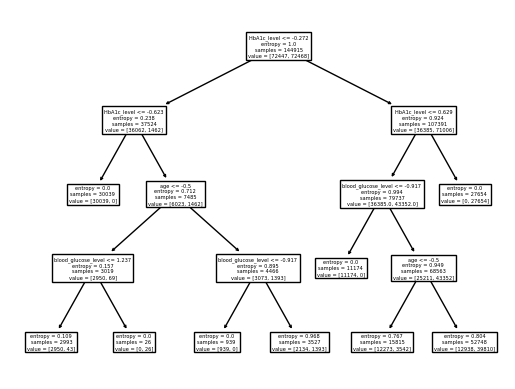

In [314]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_no_outliers.columns.tolist())

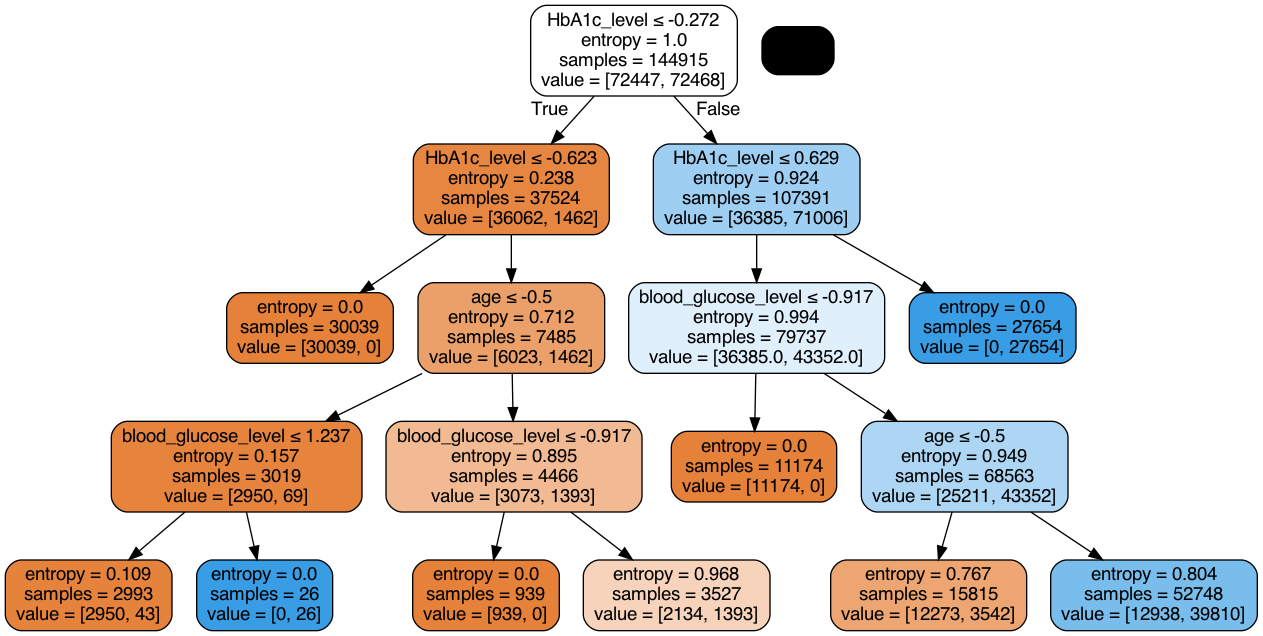

In [315]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [316]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
9709,0,0
112810,1,1
145982,1,1
92123,0,0
181123,1,1
133317,1,1
55207,0,1
105045,1,0
15618,0,1
84284,0,0


In [317]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[14965,  1273],
       [ 3160, 16831]])

In [318]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.877639460101024

Precision: 0.8419288679905957

Recall: 0.9296840477242598

F1 score: 0.8836330227063919


<h3>Hyperparameter Tuning</h3>

In [319]:
# It will take around 7 minutes to run.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [200,300,400,500,600],
    'min_samples_leaf': [2500,3000,3500,4000],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
# evaluate the model

# def function to evaluate model
def evaluate_model(model):
    predictions = model.predict(X_train)
    print("Train Accuracy :", accuracy_score(y_train,predictions))
    print('\nPrecision:',precision_score(y_train, predictions))
    print('\nRecall:',recall_score(y_train, predictions))
    print('\nF1 score:',f1_score(y_train, predictions))
    
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, predictions))
    print("-"*50)
    
    predictions = model.predict(X_test)
    print("Test Accuracy :", accuracy_score(y_test, predictions))
    print('\nPrecision:',precision_score(y_test, predictions))
    print('\nRecall:',recall_score(y_test, predictions))
    print('\nF1 score:',f1_score(y_test, predictions))
    
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# call function
evaluate_model(best_model)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
#print('accuracy:', accuracy_score)

Train Accuracy : 0.8902460062795432

Precision: 0.8763790740075325

Recall: 0.9087045316553514

F1 score: 0.8922491176012303
Train Confusion Matrix:
[[63158  9289]
 [ 6616 65852]]
--------------------------------------------------
Test Accuracy : 0.891716580639819

Precision: 0.8793536996415388

Recall: 0.9078656650463985

F1 score: 0.8933822530235086
Test Confusion Matrix:
[[15870  2255]
 [ 1668 16436]]
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4000, 'min_samples_split': 200}



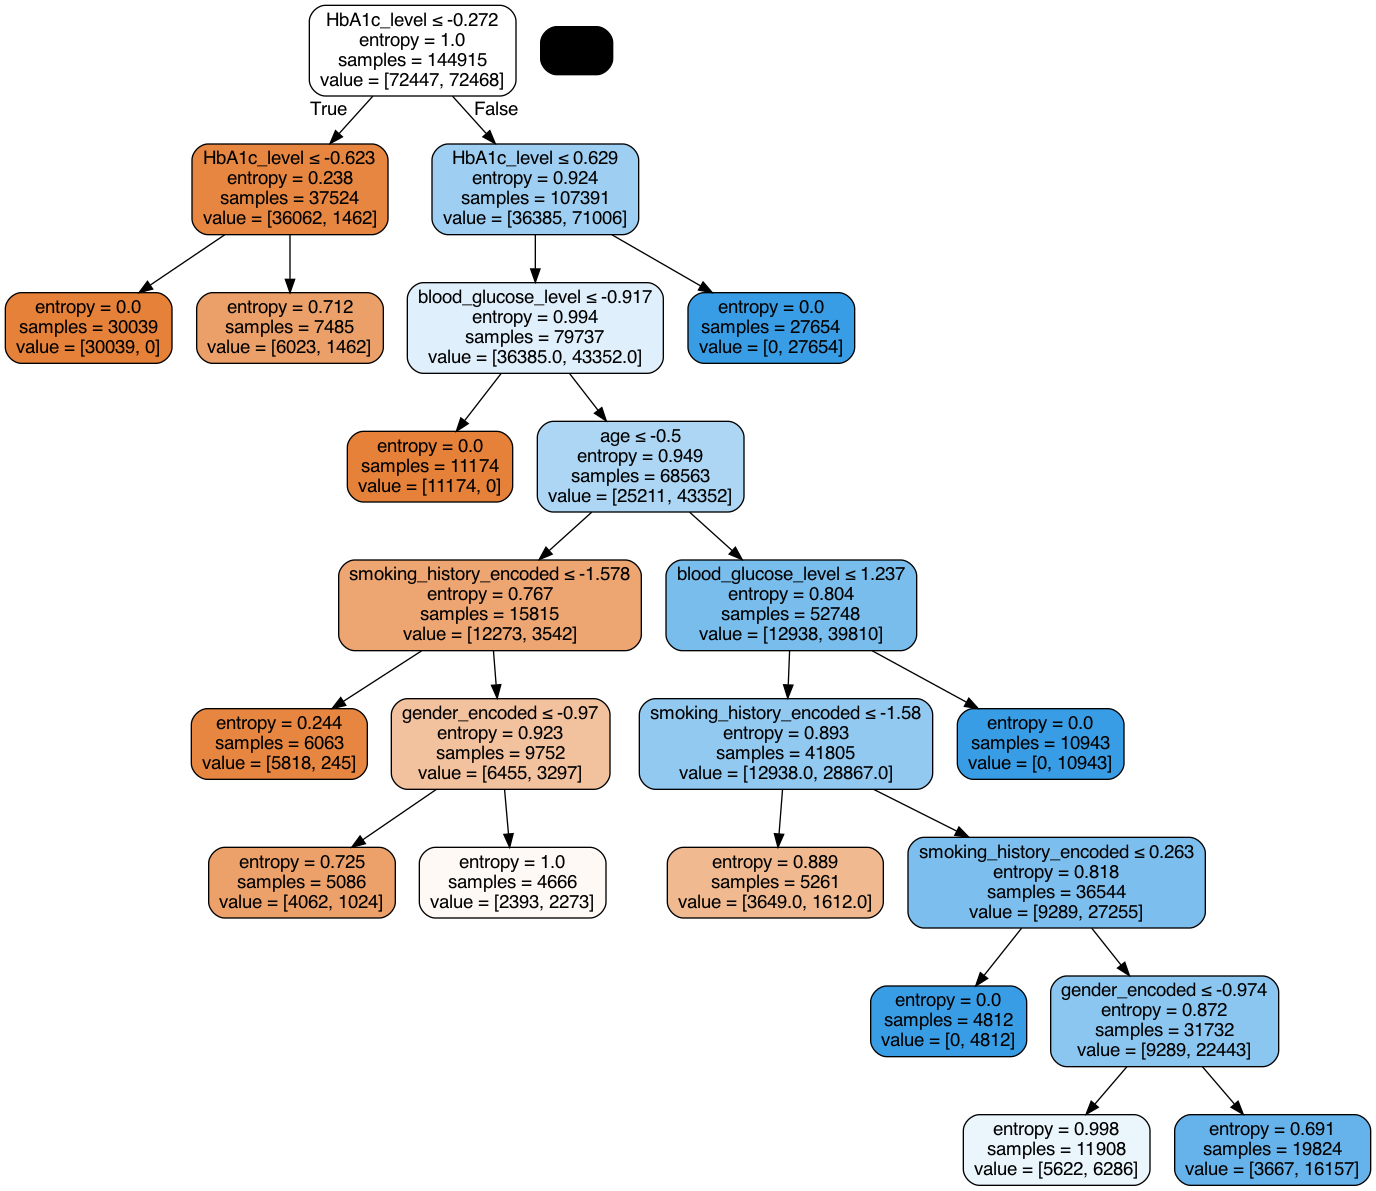

In [320]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [321]:
# check validation curve for over & under fitting
from sklearn.model_selection import validation_curve


# Decision Tree with outliers

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

In [323]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5, 0.9, 'bmi <= -0.5\nentropy = 1.0\nsamples = 4934\nvalue = [2475, 2459]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 1736\nvalue = [0, 1736]'),
 Text(0.6666666666666666, 0.7, 'HbA1c_level <= 0.076\nentropy = 0.771\nsamples = 3198\nvalue = [2475, 723]'),
 Text(0.5, 0.5, 'blood_glucose_level <= 0.343\nentropy = 0.476\nsamples = 2757\nvalue = [2475, 282]'),
 Text(0.3333333333333333, 0.3, 'HbA1c_level <= -0.544\nentropy = 0.251\nsamples = 2583\nvalue = [2475.0, 108.0]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.0\nsamples = 1199\nvalue = [1199, 0]'),
 Text(0.5, 0.1, 'entropy = 0.395\nsamples = 1384\nvalue = [1276, 108]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 174\nvalue = [0, 174]'),
 Text(0.8333333333333334, 0.5, 'entropy = 0.0\nsamples = 441\nvalue = [0, 441]')]

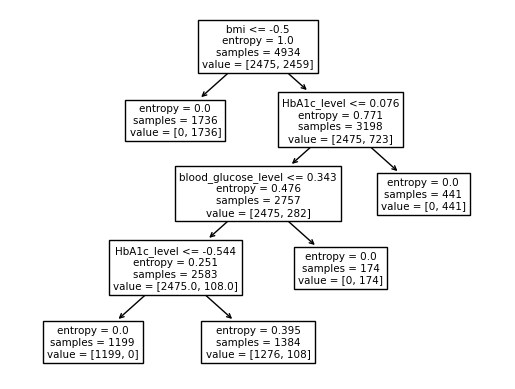

In [324]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_outliers.columns.tolist())

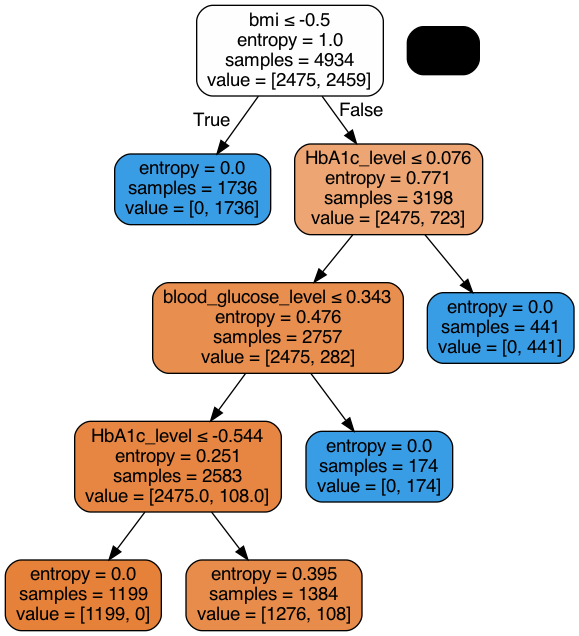

In [325]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Individuals with bmi less than 46.5 are diabetic...

In [326]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
6150,0,0
4047,0,0
3720,1,1
807,0,0
1871,1,1
1634,1,1
2552,1,1
4370,0,0
65,0,0
239,0,0


In [327]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[609,  26],
       [  0, 599]])

In [328]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))
#dtree.score(X_test, y_test)

Accuracy: 0.9789303079416531

Precision: 1.0

Recall: 0.9584

F1 score: 0.9787581699346405


<h3>Hyperparameter Tuning</h3>

In [329]:
# Faster at around 16secs
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [50,100,150,200,250],
    'min_samples_leaf': [50,100,150,200,250],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_train)

evaluate_model(best_model)
print('Best Parameters:',grid_search.best_params_,end='\n\n')

Train Accuracy : 0.9781110660721524

Precision: 1.0

Recall: 0.956079707198048

F1 score: 0.9775467775467775
Train Confusion Matrix:
[[2475    0]
 [ 108 2351]]
--------------------------------------------------
Test Accuracy : 0.9789303079416531

Precision: 1.0

Recall: 0.9584

F1 score: 0.9787581699346405
Test Confusion Matrix:
[[609   0]
 [ 26 599]]
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 50}



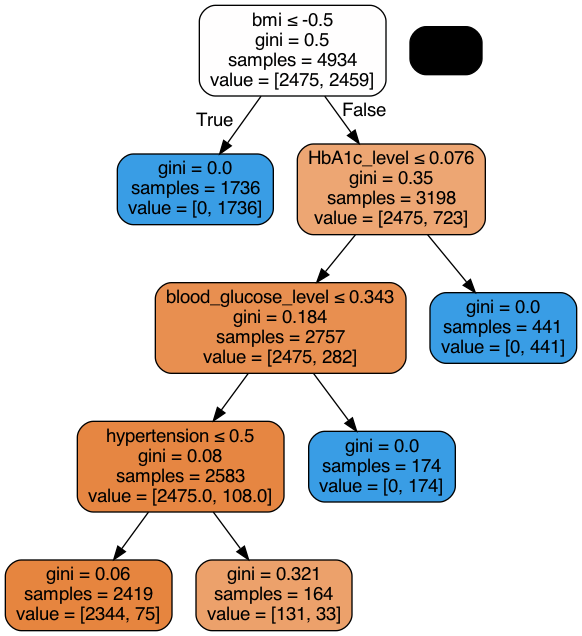

In [330]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())